### Evaluate Results

In [53]:
import pandas as pd

def read_in(csv, perc_missing):
    df = pd.read_csv(csv)
    df["perc_missing"] = perc_missing
    return df

df1 = read_in("cross_val.csv", 0.9)
df2 = read_in("", 0.8)
df3 = read_in("", 0.7)
df4 = read_in("", 0.6)
df5 = read_in("", 0.5)

df_data = [df1, df2,df3,df4,df5]
df = pd.concat(df_data)
df

,error,mean_X,deletion,svt_X,knn_X,em_X,perc_missing
0,er1,2298.942068,1.235361e-17,4064.640314,903.137246,1387.329053,0.9
1,er2,47.930185,2.227237e-09,63.741957,30.040382,37.230969,0.9
2,time,0.079799,8.908105e-03,0.014776,127.605410,15.510114,0.9
0,er1,2298.942068,1.235361e-17,4064.640314,903.137246,1387.329053,0.8
1,er2,47.930185,2.227237e-09,63.741957,30.040382,37.230969,0.8
2,time,0.079799,8.908105e-03,0.014776,127.605410,15.510114,0.8
0,er1,2298.942068,1.235361e-17,4064.640314,903.137246,1387.329053,0.7
1,er2,47.930185,2.227237e-09,63.741957,30.040382,37.230969,0.7
2,time,0.079799,8.908105e-03,0.014776,127.605410,15.510114,0.7
0,er1,2298.942068,1.235361e-17,4064.640314,903.137246,1387.329053,0.6


In [55]:
df_er1 = df[df["error"]=="er1"]
df_er2 = df[df["error"]=="er2"]
df_time = df[df["error"]=="time"]

methods = ['mean_X', 'deletion','svt_X', 'knn_X', 'em_X']

Text(0, 0.5, 'Run Time')

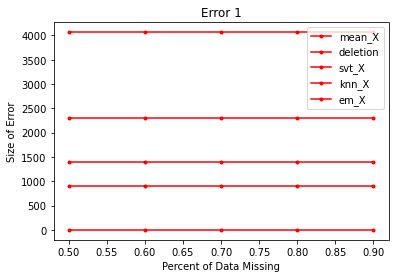

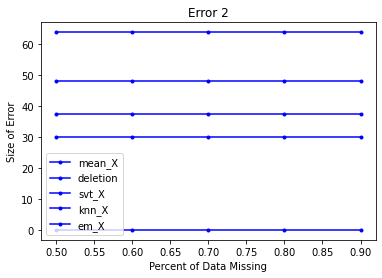

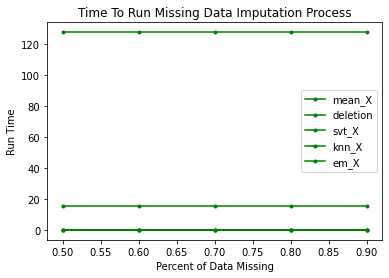

In [57]:
# Full Graphs
ax1 = df_er1.plot(kind='line', x='perc_missing', y=methods, color='r', marker=".") 
ax1.set_title("Error 1")
ax1.set_xlabel("Percent of Data Missing")
ax1.set_ylabel("Size of Error")

ax2 = df_er2.plot(kind='line', x='perc_missing', y=methods, color='b', marker=".")    
ax2.set_title("Error 2")
ax2.set_xlabel("Percent of Data Missing")
ax2.set_ylabel("Size of Error")

ax3 = df_time.plot(kind='line', x='perc_missing', y=methods, color='g', marker=".")    
ax3.set_title("Time To Run Missing Data Imputation Process")
ax3.set_xlabel("Percent of Data Missing")
ax3.set_ylabel("Run Time")